In [1]:
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [4]:
df = pd.read_csv(r'C:\Users\princy\Downloads\stock\Task_1_Stocks_dataset.csv') # data_importing
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [5]:
print("Shape of data:",df.shape)

Shape of data: (1258, 14)


In [6]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [8]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [9]:
df = df[['date','open','close']] # Extracting required columns
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


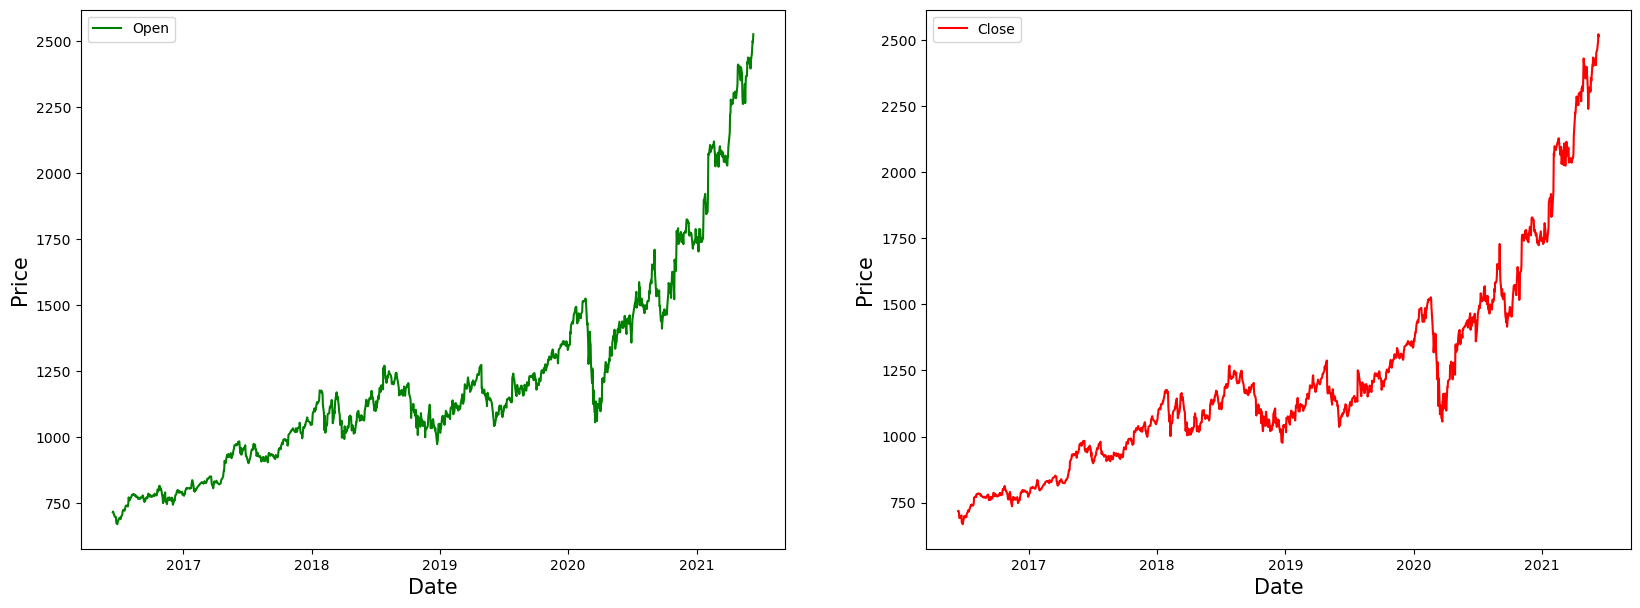

In [10]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [11]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
...,...,...
2021-06-07,0.960300,0.970049
2021-06-08,0.975716,0.979092
2021-06-09,0.986289,0.983705


In [12]:
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [13]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [14]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [15]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

In [16]:
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 16s 145ms/step - loss: 0.0106 - mean_absolute_error: 0.0727 - val_loss: 0.0367 - val_mean_absolute_error: 0.1682
Epoch 2/100
28/28 [==============================] - 2s 77ms/step - loss: 9.6330e-04 - mean_absolute_error: 0.0249 - val_loss: 0.0065 - val_mean_absolute_error: 0.0631
Epoch 3/100
28/28 [==============================] - 2s 71ms/step - loss: 4.8272e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0025 - val_mean_absolute_error: 0.0376
Epoch 4/100
28/28 [==============================] - 2s 88ms/step - loss: 4.2802e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0018 - val_mean_absolute_error: 0.0331
Epoch 5/100
28/28 [==============================] - 3s 96ms/step - loss: 4.3611e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0037 - val_mean_absolute_error: 0.0463
Epoch 6/100
28/28 [==============================] - 3s 91ms/step - loss: 4.0191e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0050 - val_mean_absolute_error: 0

28/28 [==============================] - 2s 83ms/step - loss: 1.8168e-04 - mean_absolute_error: 0.0098 - val_loss: 0.0041 - val_mean_absolute_error: 0.0502
Epoch 50/100
28/28 [==============================] - 3s 91ms/step - loss: 1.8629e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0032 - val_mean_absolute_error: 0.0438
Epoch 51/100
28/28 [==============================] - 2s 88ms/step - loss: 1.7755e-04 - mean_absolute_error: 0.0098 - val_loss: 0.0016 - val_mean_absolute_error: 0.0296
Epoch 52/100
28/28 [==============================] - 3s 93ms/step - loss: 1.8785e-04 - mean_absolute_error: 0.0098 - val_loss: 0.0031 - val_mean_absolute_error: 0.0426
Epoch 53/100
28/28 [==============================] - 2s 88ms/step - loss: 1.7019e-04 - mean_absolute_error: 0.0093 - val_loss: 0.0024 - val_mean_absolute_error: 0.0361
Epoch 54/100
28/28 [==============================] - 2s 83ms/step - loss: 1.6666e-04 - mean_absolute_error: 0.0094 - val_loss: 0.0047 - val_mean_absolute_error: 0.0541

28/28 [==============================] - 2s 82ms/step - loss: 9.7623e-05 - mean_absolute_error: 0.0070 - val_loss: 7.3548e-04 - val_mean_absolute_error: 0.0198
Epoch 98/100
28/28 [==============================] - 2s 82ms/step - loss: 9.9682e-05 - mean_absolute_error: 0.0072 - val_loss: 5.4346e-04 - val_mean_absolute_error: 0.0170
Epoch 99/100
28/28 [==============================] - 2s 78ms/step - loss: 9.6599e-05 - mean_absolute_error: 0.0069 - val_loss: 7.3165e-04 - val_mean_absolute_error: 0.0200
Epoch 100/100
28/28 [==============================] - 2s 75ms/step - loss: 1.0721e-04 - mean_absolute_error: 0.0074 - val_loss: 8.7210e-04 - val_mean_absolute_error: 0.0212


In [20]:
test_predicted = model.predict(test_seq)
test_predicted

9/9 [==============================] - 0s 28ms/step


array([[0.40923092, 0.41299558],
       [0.40866265, 0.41272017],
       [0.40534738, 0.40966243],
       [0.41084787, 0.41461015],
       [0.41522294, 0.41885555],
       [0.41974977, 0.4233085 ],
       [0.4201764 , 0.42402977],
       [0.40956405, 0.4144032 ],
       [0.41165343, 0.41588402],
       [0.41957584, 0.42315483],
       [0.42853627, 0.43177944],
       [0.43493485, 0.43821496],
       [0.4114655 , 0.41709423],
       [0.40037036, 0.4059607 ],
       [0.3993655 , 0.40419275],
       [0.4158524 , 0.41909832],
       [0.42599824, 0.42905793],
       [0.4213793 , 0.42542458],
       [0.4142108 , 0.41879112],
       [0.4172791 , 0.42123246],
       [0.42803085, 0.43114752],
       [0.42094454, 0.42511898],
       [0.41476426, 0.4191798 ],
       [0.38614705, 0.39250535],
       [0.37874046, 0.38414198],
       [0.3932227 , 0.3966875 ],
       [0.41256502, 0.41487414],
       [0.43097106, 0.43279368],
       [0.448152  , 0.44973576],
       [0.44755742, 0.4503296 ],
       [0.

In [21]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted

array([[1429.6814, 1433.6813],
       [1428.6278, 1433.1708],
       [1422.4816, 1427.5038],
       [1432.6791, 1436.6736],
       [1440.7902, 1444.5417],
       [1449.1825, 1452.7946],
       [1449.9734, 1454.1313],
       [1430.299 , 1436.29  ],
       [1434.1725, 1439.0345],
       [1448.86  , 1452.5098],
       [1465.4719, 1468.4941],
       [1477.3345, 1480.4214],
       [1433.8241, 1441.2775],
       [1413.2546, 1420.6432],
       [1411.3917, 1417.3666],
       [1441.957 , 1444.9917],
       [1460.7666, 1463.4502],
       [1452.2035, 1456.7164],
       [1438.9137, 1444.4224],
       [1444.602 , 1448.947 ],
       [1464.5349, 1467.323 ],
       [1451.3975, 1456.15  ],
       [1439.9397, 1445.1427],
       [1386.8857, 1395.7059],
       [1373.1544, 1380.2057],
       [1400.0034, 1403.4569],
       [1435.8625, 1437.1628],
       [1469.9858, 1470.3739],
       [1501.838 , 1501.7733],
       [1500.7356, 1502.8739],
       [1498.8826, 1501.7566],
       [1510.0222, 1512.1206],
       [

In [22]:
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [23]:
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1429.681396,1433.681274
2020-05-28,1396.86,1416.73,1428.627808,1433.170776
2020-05-29,1416.94,1428.92,1422.481567,1427.503784
2020-06-01,1418.39,1431.82,1432.679077,1436.673584
2020-06-02,1430.55,1439.22,1440.790161,1444.541748


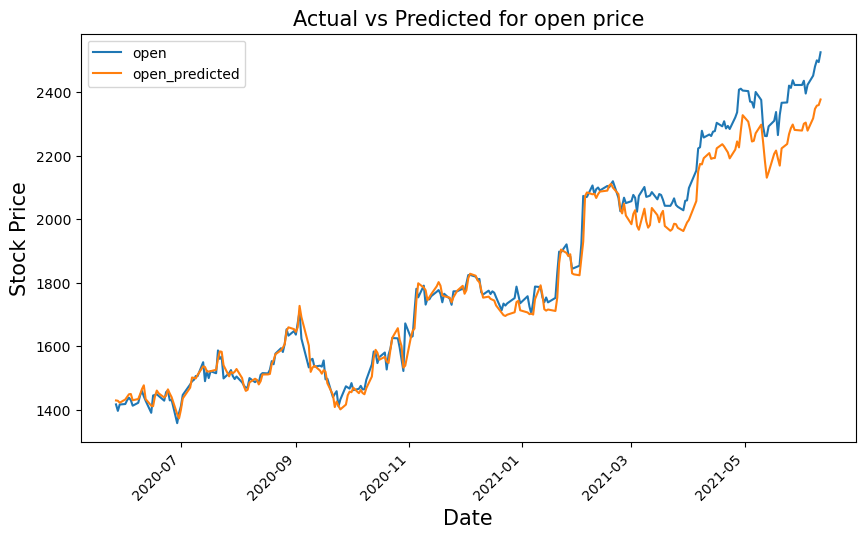

In [24]:
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

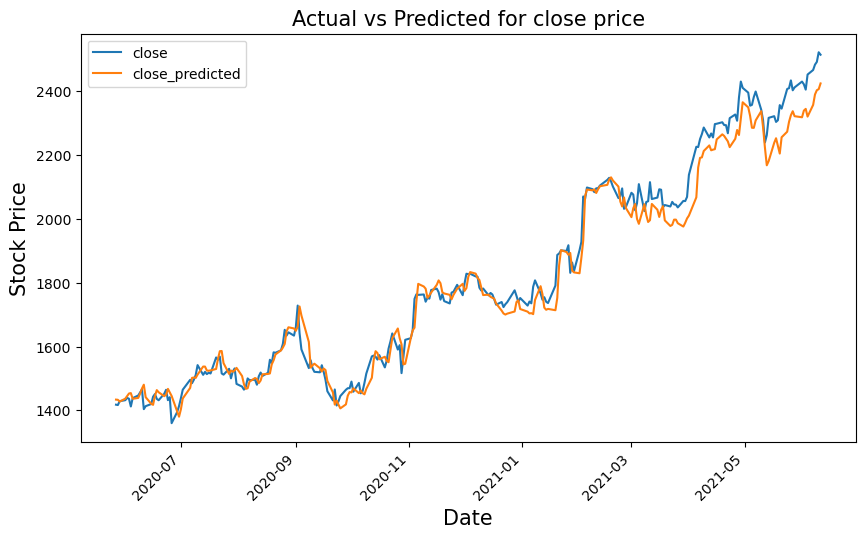

In [25]:
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [26]:
df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2357.036865,2402.761963
2021-06-10,2494.01,2521.60,2358.771484,2406.064453
2021-06-11,2524.92,2513.93,2376.416748,2423.982422
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [27]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [28]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 79ms/step


In [29]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

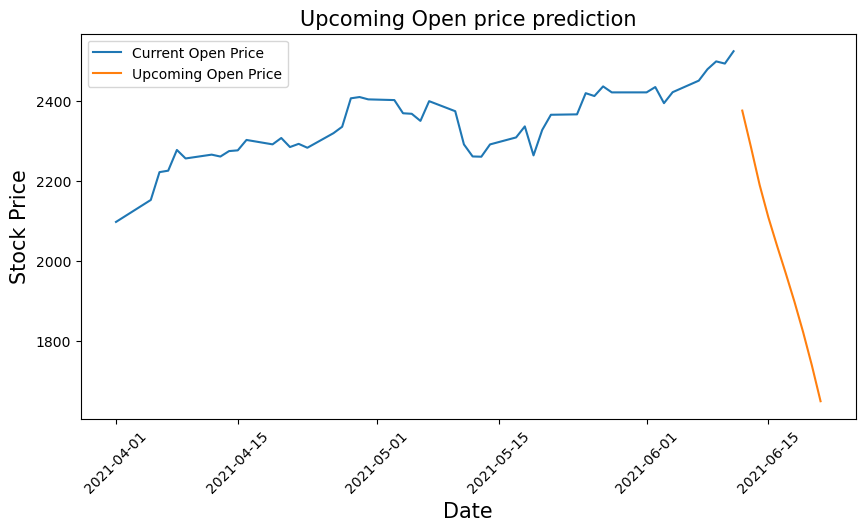

In [30]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

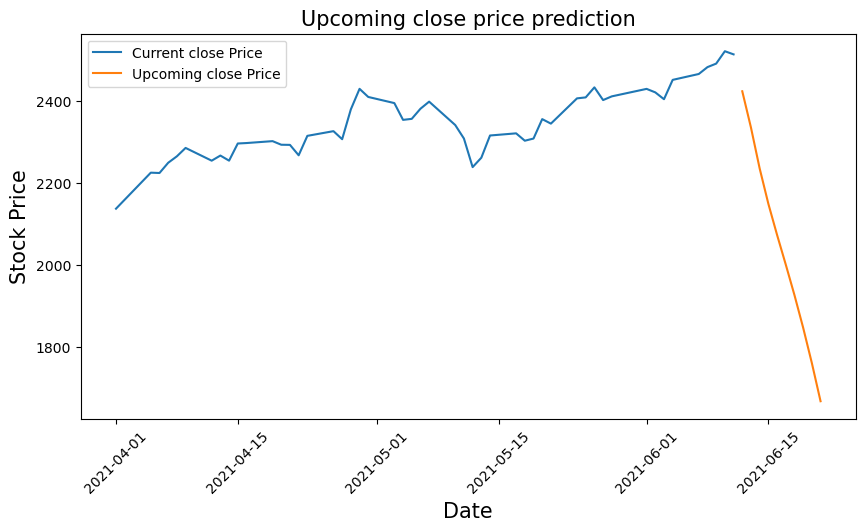

In [31]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()